
## Plot the distribution of feature

Populating the interactive namespace from numpy and matplotlib


C:\Users\chengchun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


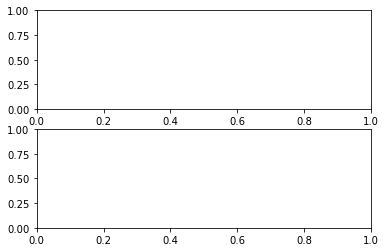

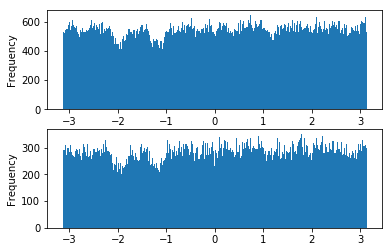

In [1]:
import numpy as np
import pandas as pd
%pylab inline
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from IPython.display import display, HTML

data = pd.read_csv('higgs-data/train.csv', na_values=-999)

mu = data.groupby('Prediction').mean()
st = data.groupby('Prediction').std()
output = pd.concat([mu,st])
output.to_csv('prop.csv')
# display(output)

fig, axes = plt.subplots(nrows=2, ncols=1)


# figure()
# data.DER_mass_MMC[data.Prediction == 'b'].plot(kind = 'hist', bins = 300, ax = axes[0])

# figure()
# data.DER_mass_MMC[data.Prediction == 's'].plot(kind = 'hist', bins = 300, ax = axes[1])



for i in data.columns[20:21]:
    fig, axes = plt.subplots(nrows=2, ncols=1)
    data[i][data.Prediction == 'b'].plot(kind = 'hist', bins = 300, ax = axes[0])
    data[i][data.Prediction == 's'].plot(kind = 'hist', bins = 300, ax = axes[1])
    fig1 = fig.get_figure()
    fig.savefig(i+'.jpg')

## PCA

In [ ]:
# stand_x = np.delete(stand_x, [14, 15, 17, 18, 20, 24, 25, 28], 1)
# stand_x = np.delete(stand_x, [14, 15, 17, 18, 20, 24, 25, 28], 1)

x_tmp = stand_x.T
# x1.shape
# u,s,v = np.linalg.svd(x1)

cov_mat = np.cov([x_tmp[i,:] for i in range(x_tmp.shape[0])])
eig_val, eig_vec = np.linalg.eig(cov_mat)
# eig_val

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low

eig_pairs.sort(key=lambda x: x[0], reverse=True)
num = eig_pairs[0][1].shape[0]
eig_vec1 = np.hstack([eig_pairs[i][1].reshape([num,1]) for i in range(18)])
eig_vec1.shape


x1 = eig_vec1.T@x_tmp
stand_x = x1.T
stand_x.shape

num = 13
s1 = s.copy()
s1.resize(num)
s_reduced = np.diag(s1)
x1_reduce = u[:, :num]@s_reduced@v[:num,:]


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scripts.preprocess import *

In [3]:
data = pd.read_csv('higgs-data/train.csv', na_values= -999)

In [4]:
data.head()

# data[data['DER_mass_MMC'] != -999]

for i in data.columns[2:]:
    data[i] -= data[i].mean()
    data[i] /= data[i].std()
    
data = data.fillna(0)


In [5]:
# data.sort_values('Prediction', ascending=False)
len(data.Prediction[data.Prediction == 's'])
data1 = data.sort_values('Prediction', ascending = False)[0:85667*2]
data2 = data1.loc[range(14)]

In [6]:
data2 = data1[0:1000]
data2 = data2.append(data1[85667:86667])
# len(data2[data2.Prediction == 'b'])

In [ ]:
plt.show()
mat = data[data.columns[2:5]]
smat = scatter_matrix(mat, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:
smat[0,0]

In [7]:
fig, axs = plt.subplots(16)

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6288627710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6278021e80>]], dtype=object)

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(1974)

df = pd.DataFrame(
    np.random.normal(10, 1, 30).reshape(10, 3),
    index=pd.date_range('2010-01-01', freq='M', periods=10),
    columns=('one', 'two', 'three'))
df['key1'] = (4, 4, 4, 6, 6, 6, 8, 8, 8, 8)

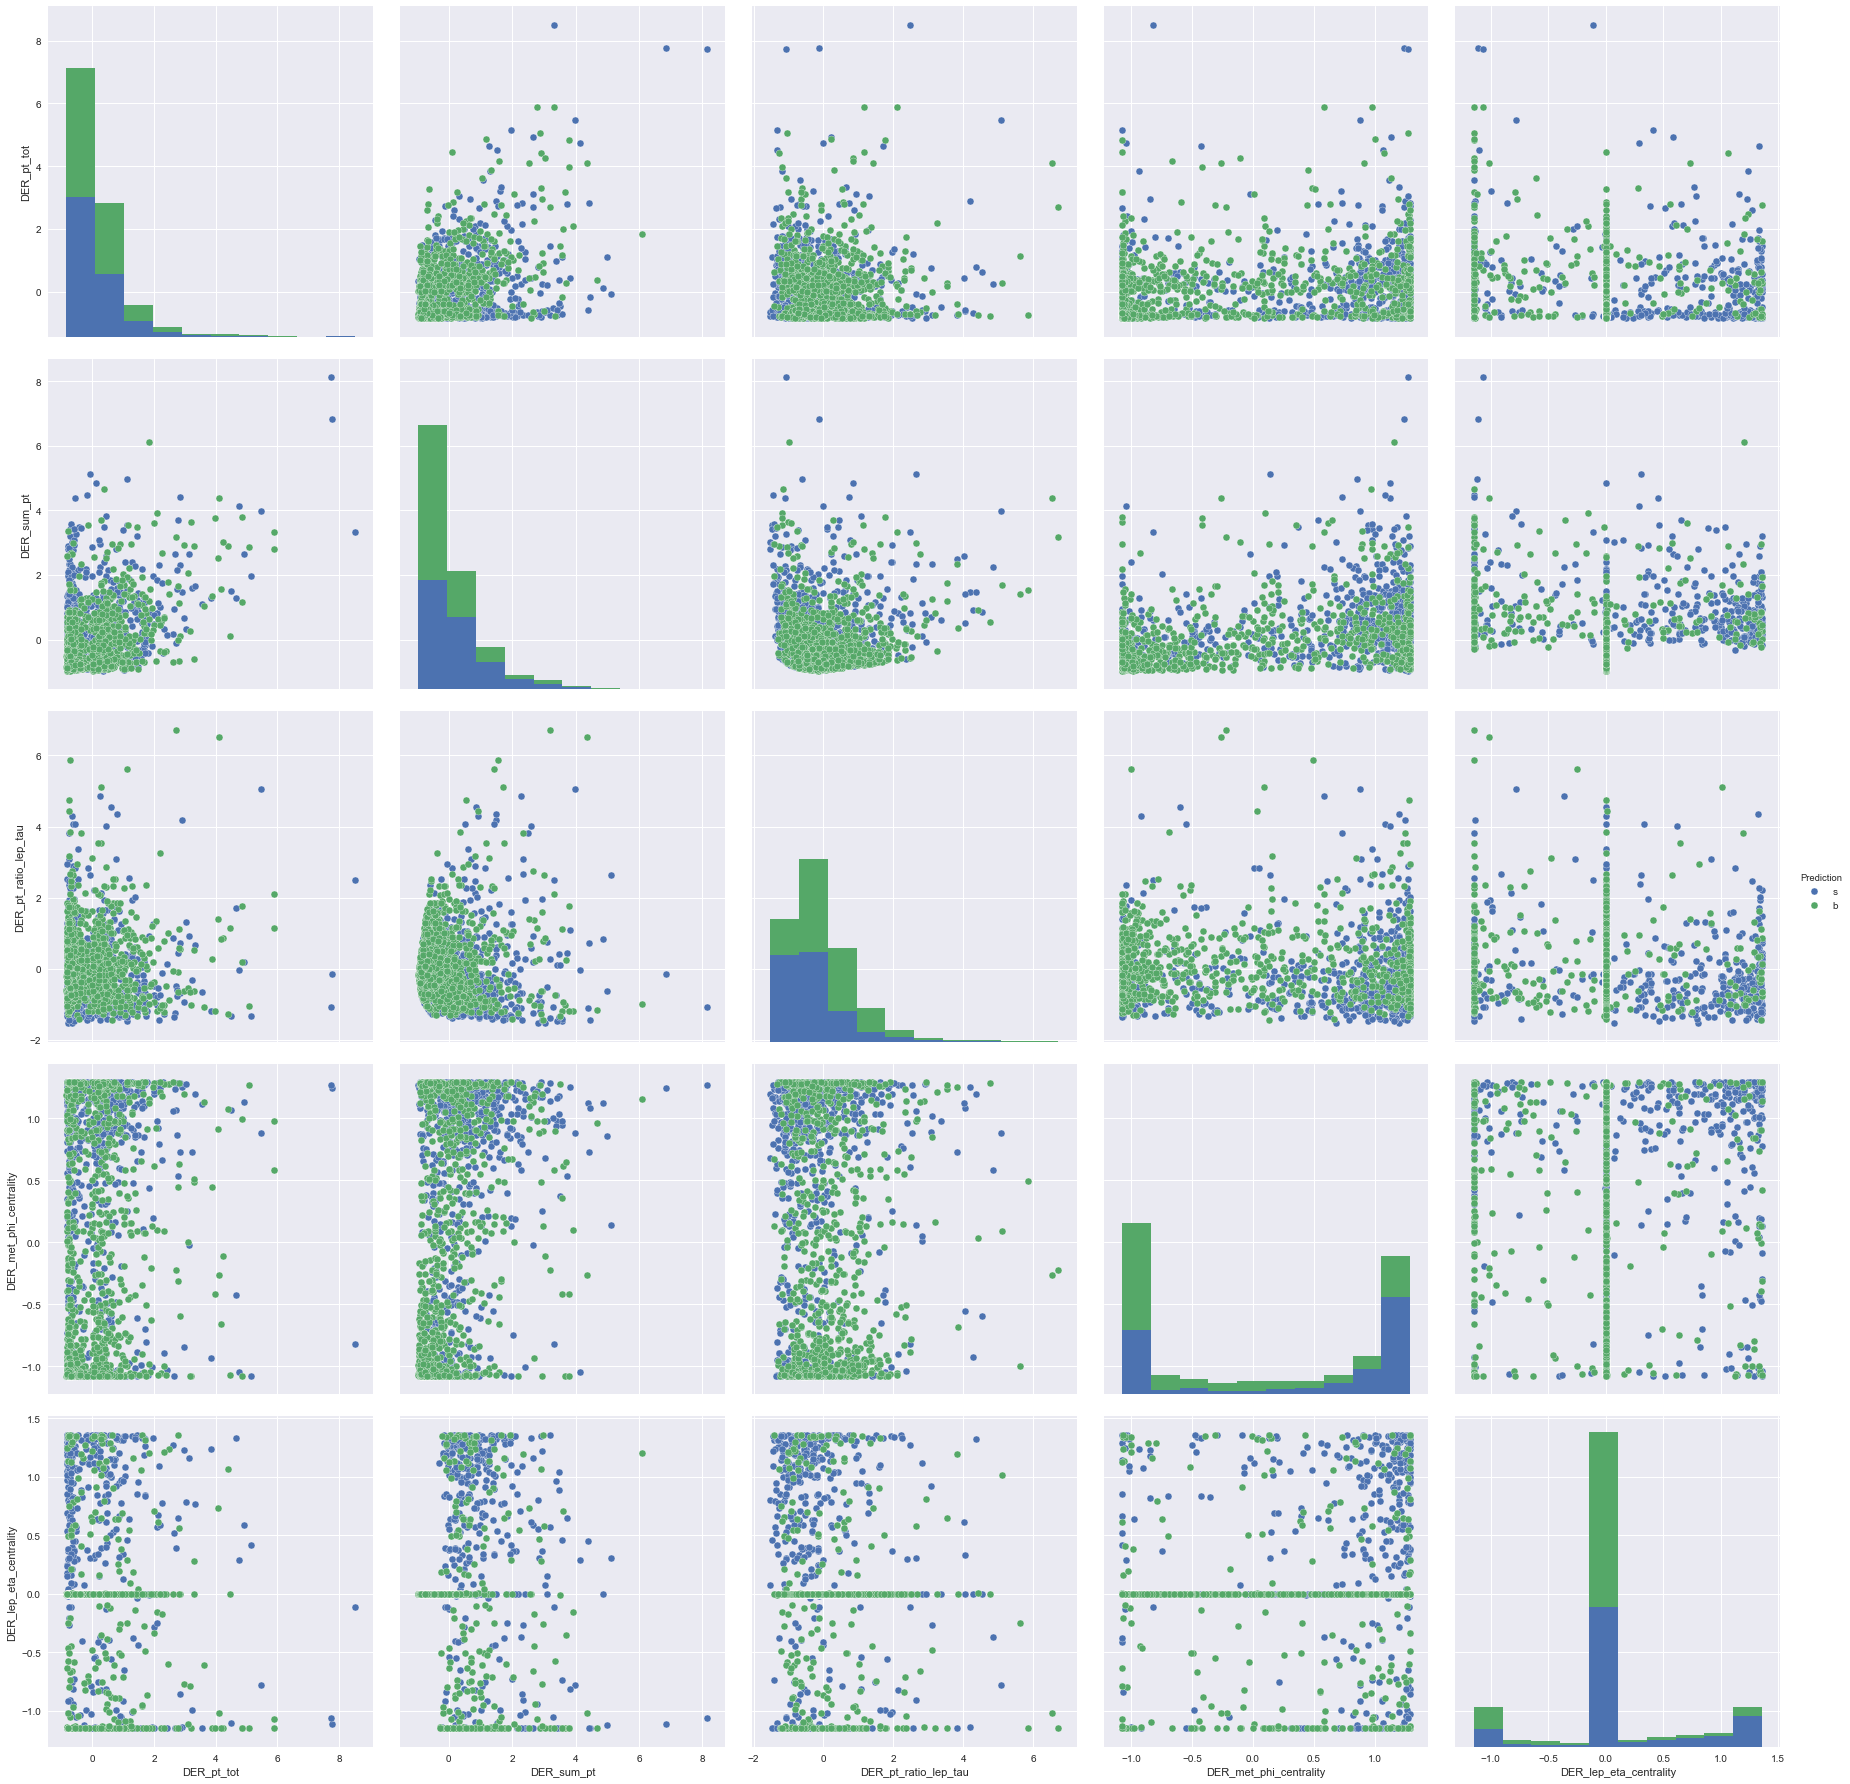

In [11]:
# mat = data[data.columns[1:5]]
sns.pairplot(vars=data2.columns[10:15], data=data2, hue="Prediction", size=5)
plt.show()

# mat.head()

In [ ]:
plt.show()